In [1]:
%matplotlib inline
# import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# To create the summary DataFrame, follow these steps:
# From the merged DataFrame get the total rides, total drivers, and total fares for each city type using the groupby() function on the city type.

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [3]:
# Calculate the sum of rides for each city type.
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
print(sum_rides_by_type)

# Calculate the sum of drivers for each city type.
sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
print(sum_drivers_by_type)

# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
print(sum_fares_by_type)



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64
type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64
type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [4]:
# Calculate the average fare per ride and the average fare per driver for each city type.

mean_fare_per_ride = np.divide(sum_fares_by_type, sum_rides_by_type)

mean_fare_per_driver = np.divide(sum_fares_by_type, sum_drivers_by_type)

df = pyber_data_df.drop(['city', 'date', 'fare', 'ride_id', 'driver_count'], axis=1).set_index('type', drop=False)
type_var_df = pd.DataFrame(df["type"].unique(), columns=['type']).set_index('type', drop=True)
print(type_var_df)

Empty DataFrame
Columns: []
Index: [Urban, Suburban, Rural]


In [5]:
# To format the summary DataFrame, follow these steps:
# Delete the index name.
# Create the summary DataFrame with the appropriate columns, and apply formatting where appropriate.
summary_df = pd.concat([type_var_df, sum_rides_by_type, sum_drivers_by_type, sum_fares_by_type, mean_fare_per_ride, mean_fare_per_driver],axis=1,sort=False)
# df.rename(columns = {'index':'Col1'})
summary_df.columns = ['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']

summary_df.reset_index(None)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Urban,1625,2405,39854.38,24.525772,16.571468
Suburban,625,490,19356.33,30.970128,39.502714
Rural,125,78,4327.93,34.623440,55.486282


In [6]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [7]:
# Technical Analysis Deliverable 2: Multiple-Line Plot for the Sum of the Fares for Each City Type
# For the second technical analysis, you’ll use your skills and knowledge from the Pandas and Matplotlib 
# libraries to plot the sum of the fares for each city type so that your final line chart looks like this:

# The average fare for each city for each week from January 1, 2019 to April 28, 2019.

# After merging the DataFrames, do the following:

# Rename columns {'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}.

# df.rename(columns = {'index':'Col1'})
pyber_data_df.rename(columns = {'city':'City', 
                                'date':'Date',
                                'fare':'Fare', 
                                'ride_id': 'Ride Id',
                                'driver_count': 'No. Drivers', 
                                'type':'City Type'}, inplace=True) 


# Set the index to the Date column.
pyber_data_df = pyber_data_df.set_index('Date')

pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [8]:
# Create a new DataFrame, like the one below, for fares, and include only the City Type and Fare columns using the copy() method on the merged DataFrame.
# A DataFrame with the Date as the index with the City Type and Fare columns.


new_pyber_df = pyber_data_df[['City Type', 'Fare']].copy()
new_pyber_df.head(10)


,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
2019-03-11 12:26:48,Urban,9.52
2019-02-27 11:17:56,Urban,43.25
2019-04-26 00:43:24,Urban,35.98
2019-01-08 03:28:48,Urban,35.09


In [9]:
# Set the index to the datetime data type.
# Check to make sure the index is a datetime data type by using the info() method on the DataFrame.
# Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
# Convert the groupby Series into a DataFrame.
# NOTE
# You can create the DataFrame on a groupby() object in one step.
new_pyber_df.index =  pd.to_datetime(new_pyber_df.index)
new_pyber_df.sort_index()

# new_pyber_df.info()
chart_df = pd.DataFrame(new_pyber_df.groupby([pd.Grouper(freq='D'), "City Type"]).sum()["Fare"])

print(chart_df.info())
chart_df

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 334 entries, (Timestamp('2019-01-01 00:00:00', freq='D'), 'Rural') to (Timestamp('2019-05-08 00:00:00', freq='D'), 'Urban')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    334 non-null    float64
dtypes: float64(1)
memory usage: 4.7+ KB
None


Fare
Date       City Type        
2019-01-01 Rural       43.69
           Suburban   128.52
           Urban      127.78
2019-01-02 Rural       52.12
           Suburban   274.92
...                      ...
2019-05-06 Urban      181.20
2019-05-07 Rural       44.94
           Suburban   274.09
           Urban      258.01
2019-05-08 Urban      170.82

[334 rows x 1 columns]

In [10]:
# Reset the index, then create a pivot table DataFrame with the Date as the index and columns = 'City Type'. 
# The Fare for each Date should appear in each row.
# NOTE
# Some rows will contain NaNs, but those will be addressed when you sum based on the weekly bins in Step 9.

# A DataFrame pivot table with the "Date" as the index,the columns of each City Type, and the fare in each row.
pivot_df = pd.pivot_table(chart_df, index='Date', columns='City Type', values='Fare')
pivot_df


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [11]:
# Create a new DataFrame from the pivot table DataFrame on the given dates, '2019-01-01':'2019-04-28', using loc.
# If you'd like a hint about how to use the loc attribute, that's totally okay. If not, that's great, too. You can always revisit this later if you change your mind.
new_chart_df = pivot_df.loc['2019-01-01':'2019-04-28']
new_chart_df



City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-24,NaN,220.72,312.64
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98


In [12]:
# HINT
# Create a new DataFrame by setting the DataFrame you created in Step 8 with resample() in weekly bins, and calculate the sum() of the fares for each week in the resampled data.
# If you’d like a hint on how to use the resample() method that’s totally okay. If not, that’s great too. You can always revisit this later if you change your mind.
new_df = new_chart_df.resample('W').sum()
new_df


City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [13]:
# HINT
# Using the object-oriented interface method, plot the DataFrame you created in Step 9 using the df.plot() function. 
#Things to consider with your plotting:
# Import the style from Matplotlib.
# Use the FiveThirtyEight (Links to an external site.) graph style.
# Add a title.
# Add x- and y-axis labels according to the final figure.
# Save the figure to the “analysis” folder.
# Make the figure size large enough so it’s not too small.
# Add all ride count box-and-whisker plots to the same graph.
# x_labels = ["Urban", "Suburban","Rural"]
# fares_data = [urban_fares, suburban_fares, rural_fares]

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.set_title('Ride Fare Data by City Type (2019)',fontsize=20)
# ax.set_ylabel('Fare($USD)',fontsize=14)
# ax.set_xlabel("City Types",fontsize=14)
# ax.boxplot(fares_data, labels=x_labels)
# ax.set_yticks(np.arange(0, 63, step=3.0))
# ax.grid()
# # Save the figure.
# plt.savefig("analysis/Fig3.png")
# plt.show()

In [13]:
# Import the style from Matplotlib.
# Use the FiveThirtyEight (Links to an external site.) graph style.
plt.style.use('fivethirtyeight')

In [14]:
from matplotlib.dates import DateFormatter
#formatter = DateFormatter('%m')
# plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
new_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


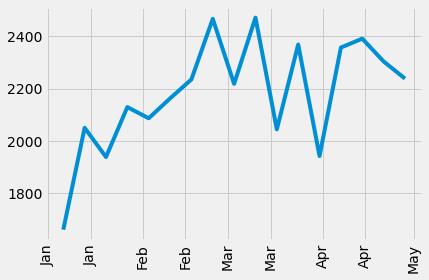

In [15]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig,ax1 = plt.subplots()
plt.plot(new_df.index,new_df.Urban)
monthyearFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

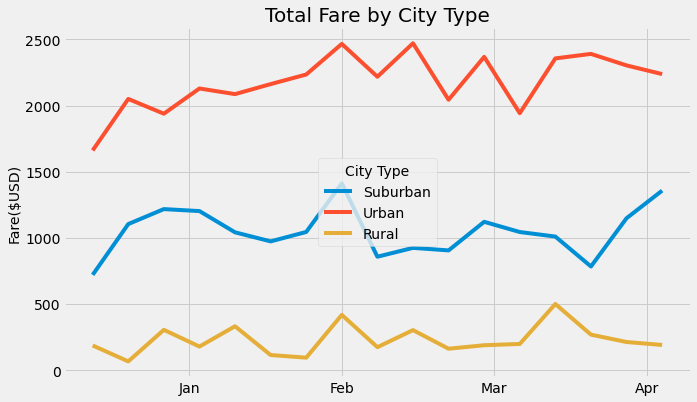

In [19]:
# Add a title.
# Add x- and y-axis labels according to the final figure.

x_axis = pd.to_datetime(new_df.index, format='%b')


monthFmt = mdates.DateFormatter('%b')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Total Fare by City Type',fontsize=20)
ax1.set_xlabel('')
ax1.set_ylabel('Fare($USD)',fontsize=14)

y_axis = new_df.Suburban
y2_axis = new_df.Urban 
y3_axis = new_df.Rural
ax1.set_yticks([0, 500, 1000, 1500, 2000, 2500])

ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))
# ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(monthFmt)

ax1.plot(x_axis, y_axis, label='Suburban')
ax1.plot(x_axis, y2_axis, label='Urban')
ax1.plot(x_axis, y3_axis, label='Rural')


# Function add a legend   
plt.legend(loc="center", title="City Type") 
plt.savefig("analysis/PyberChallenge.png")  
# function to show the plot 
plt.show() 

In [17]:
# Save the figure to the “analysis” folder.
# Make the figure size large enough so it’s not too small.

plt.show()

In [18]:
new_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [20]:
# Delivering Results
# To deliver the results of your analysis, you will submit a written analysis created for your CEO, V. Isualize, in the form of a README.md file on your GitHub repository. In your README.md, you should have three paragraphs consisting of 4 to 5 sentences each.

# The first paragraph should include the following:

# Describe the purpose, or the reason, you did this assignment.
# How did you analyze the data to create the technical deliverables?
# What can be said about the summary DataFrame and multiple-line graph with respect to the ride-sharing data among the different city types? Include images of the summary DataFrame table and the multiple-line graph in these results.
# A short summary of the results.
# The second paragraph should include the following:

# What challenges or difficulties did you encounter? If none, then briefly explain what challenges or difficulties may be encountered and how to avoid them using technical analysis.
# Explain how you overcame any challenges or difficulties, and include what technical analysis you use to overcome the challenges or difficulties.
# The third paragraph should include the following:

# Based on the data from the different city types, what recommendations would you give the CEO for addressing any disparities among the city types?
# Provide two additional analyses you could do to gain more insight into the data, like using other datasets.
# What technical steps would you take to perform the additional analyses?

